In [36]:
import numpy as np
import scipy.signal as sig
import scipy as sp
import matplotlib.pyplot as plt

In [15]:
def DFT(fdata):
    N = len(fdata)
    j = complex(0, 1)
    Fdata = []
    for k in range(N):
        temp = 0
        for f, n in zip(fdata, range(N)):
            temp += f*np.e**(-j*2*np.pi*n*k/N)
        Fdata.append(temp)
    return Fdata
        
def IDFT(Fdata):
    N = len(Fdata)
    j = complex(0, 1)
    fdata = []
    for n in range(N):
        temp = 0
        for F, k in zip(Fdata, range(N)):
            temp += (1/N)*F*np.e**(j*2*np.pi*n*k/N)
        fdata.append(temp)
    return fdata

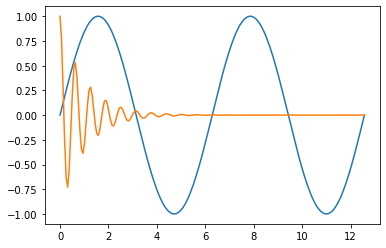

In [234]:
t = np.linspace(0, 4*np.pi, 200)
dw = 2*np.pi/(len(t)*(t[2]-t[1]))
w = np.array(range(len(t)))*dw

#Input data
x1 = []
for ti in t:
    if ti < 10:
        x1.append(0)
    else:
        x1.append(1)
x2 = np.sin(t)
x3 = np.ones(len(t))
x4 = sig.unit_impulse(len(t))
x = x2

#Filter/impulse response to convolve
a = 10
h1 = np.sinc(a*t)*a/8
h2 = np.ones(len(t))
h3 = np.e**(-t)*np.cos(a*t)
h = h3

#Plot
plt.plot(t, x)
plt.plot(t, h)
plt.show()

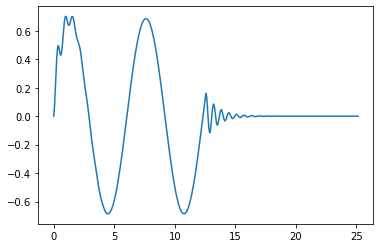

In [235]:
y = sig.convolve(x, h, mode="full")

#Note that when using "full" mode, convolve also returns values after tmax of input
t1 = np.linspace(0, 2*max(t), 2*len(t)-1)
plt.plot(t1, y)
plt.show()

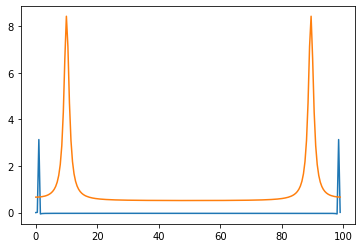

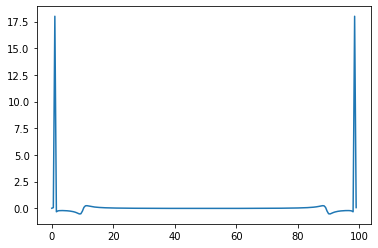

In [236]:
Fx = np.array(DFT(x))
Fh = np.array(DFT(h))
Fy = Fx*Fh
plt.plot(w, Fx)
plt.plot(w, Fh)
plt.show()
plt.plot(w, Fy)
plt.show()

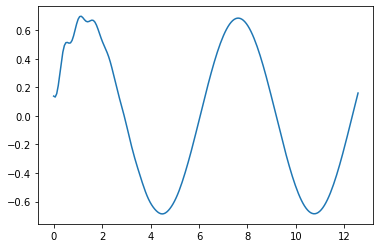

In [237]:
y = IDFT(Fy)
plt.plot(t, y)
plt.show()

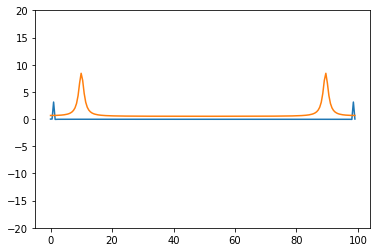

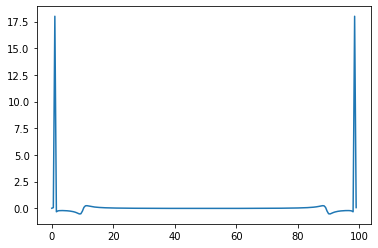

In [238]:
#Fast fourier transform
Fx = sp.fft(x)
Fh = sp.fft(h)
Fy = Fx*Fh
plt.plot(w, Fx)
plt.plot(w, Fh)
plt.ylim(-20, 20)
plt.show()
plt.plot(w, Fy)
plt.show()

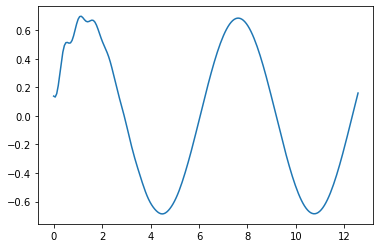

In [239]:
y = np.fft.ifft(Fy)
plt.plot(t, y)
plt.show()